# 8.1P 

 ### Question 1
 
 Download Electrical Grid Stability Simulated Datadatasets. Classify "Electrical Grid Stability Simulated Data" classes using KNN. Use the same data splitting and performance metrics that you have used in previous week (week 7, Q-2). Report your findings including comparison of results with week 7


In [16]:
#Import modules

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


_**Download Electrical Grid Stability Simulated Data datasets.**_

In [17]:
#Read in dataset
df = pd.read_csv('../data/Data_for_UCI_named.csv')
#Print dimensions
rows, cols = df.shape
print("Data has {} rows with {} columns".format(rows, cols))

df.head()

Data has 10000 rows with 14 columns


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


Prepare data

In [18]:
# Divide this data into features and labels
X = np.asarray(df.drop(['stabf'], axis=1))
y = np.asarray(df['stabf'])

#Standardise the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Print the type for X and y
print ("X is of type: {}".format(type(X)))
print ("y is of type: {}".format(type(y)))

# Print the unique labels in y
print ("Unique labels: {}".format(np.unique(y)))

X is of type: <class 'numpy.ndarray'>
y is of type: <class 'numpy.ndarray'>
Unique labels: ['stable' 'unstable']


_**Use the same data splitting and performance metrics that you have used in previous week (week 7, Q-2)**_

In [19]:
#Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the  number of samples in train and test data groups
print("Number of X_train samples: ", X_train.shape[0])
print("Number of X_test samples: ", X_test.shape[0])

Number of X_train samples:  8000
Number of X_test samples:  2000


_**Classify "Electrical Grid Stability Simulated Data" classes using KNN.**_

In [20]:
# Build a kNN model using 6 nodes (5 neighbor nodes training accuracy = 0.7735)
knn_model = KNeighborsClassifier(n_neighbors=6)

# Fit the model using training data
knn_model.fit(X_train, y_train)

# Training accuracy
knn_acc = metrics.accuracy_score(y_train, knn_model.predict(X_train))
print ("KNN Training Accuracy: {}".format(knn_acc))

KNN Training Accuracy: 0.964375


Text(0, 0.5, 'Accuracy Score')

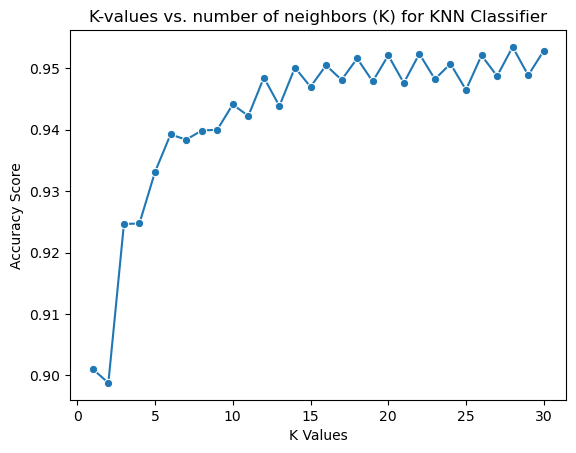

In [21]:
# Lists for cross-validation scores
k_values = [i for i in range (1,31)]
scores = []

# Loop through k values and calculate cross-validation scores
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))

# Plot k values vs. cross validation score
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.title("K-values vs. number of neighbors (K) for KNN Classifier")
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

_**Report your findings including comparison of results with week 7**_

In [22]:
# Performance metrics

y_pred = knn_model.predict(X_test)

# Training accuracy
knn_acc = metrics.accuracy_score(y, knn_model.predict(X))
print ("KNN Training Accuracy: {}\n".format(knn_acc))

# Classification report
print(classification_report(y_test, y_pred))

KNN Training Accuracy: 0.9587

              precision    recall  f1-score   support

      stable       0.88      0.94      0.91       693
    unstable       0.97      0.93      0.95      1307

    accuracy                           0.94      2000
   macro avg       0.92      0.94      0.93      2000
weighted avg       0.94      0.94      0.94      2000



 ### Question 2
 
 Load Electrical Grid Stability Simulated Data and create classification model using DT algorithm using 50-50% and 80-20% data splitting methods. Compare performances of these two models and explain impact of difference in data splitting on the performances of the model.

In [23]:
#Import modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text


_**Load Electrical Grid Stability Simulated Data**_

In [24]:
#Read in dataset
df = pd.read_csv('../data/Data_for_UCI_named.csv')

#Print dimensions
rows, cols = df.shape
print("Data has {} rows with {} columns".format(rows, cols))

df.head()

Data has 10000 rows with 14 columns


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [25]:
# Map categorical variable stabf - swap values to 0 and 1 (necessary for AUC ROC)
df['stabf'] = df['stabf'].map({'unstable': 0, 'stable': 1})

# Divide data into features and labels
X = np.asarray(df.drop(['stabf'], axis=1))
y = np.asarray(df['stabf'])

features = ['tau1','tau2','tau3','tau4','p1','p2','p3','p4','g1','g2','g3','g4','stab']

#Standardise the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

_**Create classification model using DT algorithm using 50-50% data splitting method**_

In [26]:
# Split the data into training and testing datasets - 50:50
X_train_50_50, X_test_50_50, y_train_50_50, y_test_50_50 = train_test_split(X, y, test_size=0.5, random_state=42)

# Print the  number of samples in train and test data groups
print("Number of X_train samples (50:50 split): ", X_train_50_50.shape[0])
print("Number of X_test samples(50:50 split): ", X_test_50_50.shape[0])

Number of X_train samples (50:50 split):  5000
Number of X_test samples(50:50 split):  5000


In [27]:
# Create decision tree classifier object (50:50 split)
dt_50_50 = DecisionTreeClassifier()

#Fit the model using our training data
dt_50_50.fit(X_train_50_50, y_train_50_50)

DecisionTreeClassifier()

Performance metrics

In [28]:
y_pred_50_50 = dt_50_50.predict(X_test_50_50)

# Training accuracy
print("Accuracy (50:50 split): ", metrics.accuracy_score(y_test_50_50, y_pred_50_50))

# Classification report
print(classification_report(y_test_50_50, y_pred_50_50, digits=3))


Accuracy (50:50 split):  0.9998
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      3205
           1      0.999     1.000     1.000      1795

    accuracy                          1.000      5000
   macro avg      1.000     1.000     1.000      5000
weighted avg      1.000     1.000     1.000      5000



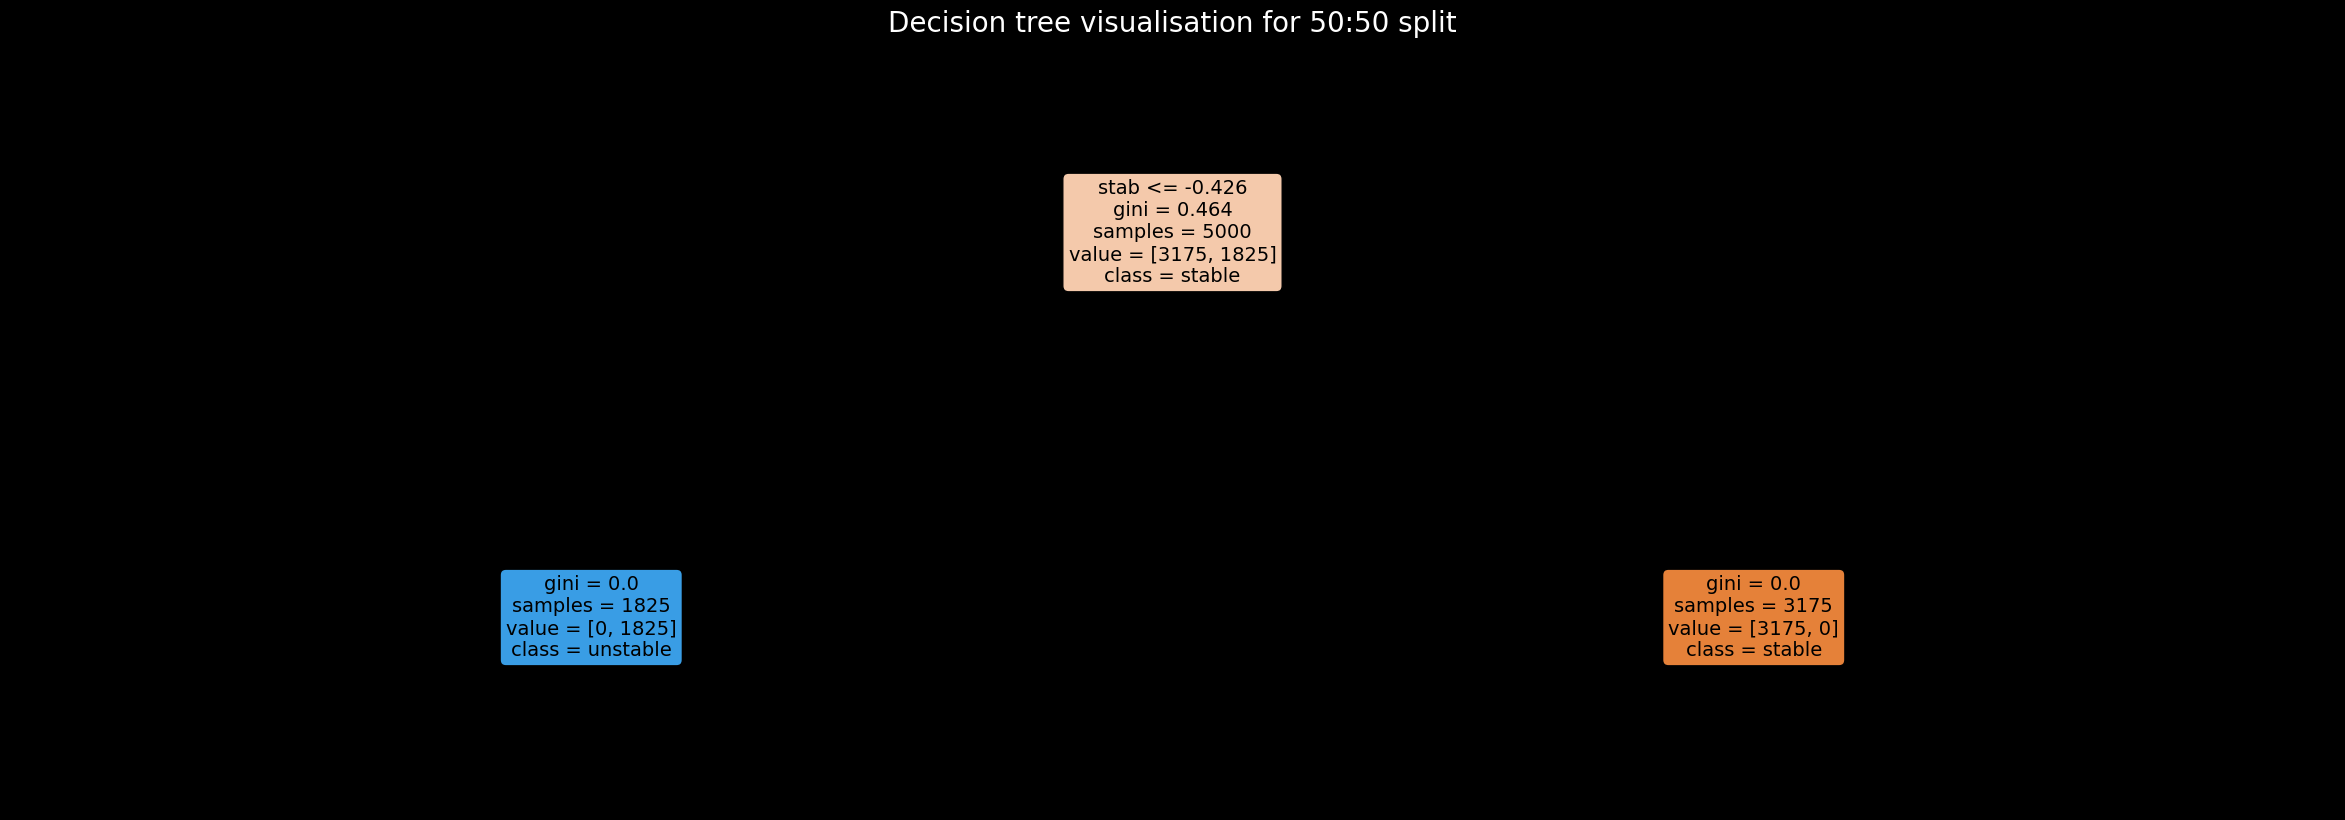

In [29]:
plt.figure(figsize=(30,10), facecolor ='k') # facecolor is background color, k is black

a = tree.plot_tree(dt_50_50,
                   feature_names = features,
                   class_names = ['stable','unstable'],
                   rounded = True,
                   filled = True,
                   fontsize=14)
plt.title('Decision tree visualisation for 50:50 split', fontsize=20, color='white')
plt.show()

# The decision tree is shallow because stab is almost perfectly predicts stabf

In [30]:
tree_rules = export_text(dt_50_50, feature_names = list(features))

print(tree_rules)

# The decision tree rules further demonstrate that stab is almost perfectly predicts stabf after only one split

|--- stab <= -0.43
|   |--- class: 1
|--- stab >  -0.43
|   |--- class: 0



_**Create classification model using DT algorithm using 80-20% data splitting method**_

In [31]:
# Split the data into training and testing datasets - 80:20
X_train_80_20, X_test_80_20, y_train_80_20, y_test_80_20 = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the  number of samples in train and test data groups
print("Number of X_train samples: ", X_train_80_20.shape[0])
print("Number of X_test samples: ", X_test_80_20.shape[0])

Number of X_train samples:  8000
Number of X_test samples:  2000


In [32]:
# Create decision tree classifier object (80:20 split)
dt_80_20 = DecisionTreeClassifier()

#Fit the model using our training data
dt_80_20.fit(X_train_80_20, y_train_80_20)

DecisionTreeClassifier()

_**Compare performances of these two models**_

In [33]:
y_pred_80_20 = dt_80_20.predict(X_test_80_20)

# Training accuracy
print("Accuracy (80:20 split): ", metrics.accuracy_score(y_test_80_20, y_pred_80_20))

# Classification report
print(classification_report(y_test_80_20, y_pred_80_20, digits=3))

Accuracy (80:20 split):  0.9995
              precision    recall  f1-score   support

           0      1.000     0.999     1.000      1307
           1      0.999     1.000     0.999       693

    accuracy                          1.000      2000
   macro avg      0.999     1.000     0.999      2000
weighted avg      1.000     1.000     1.000      2000



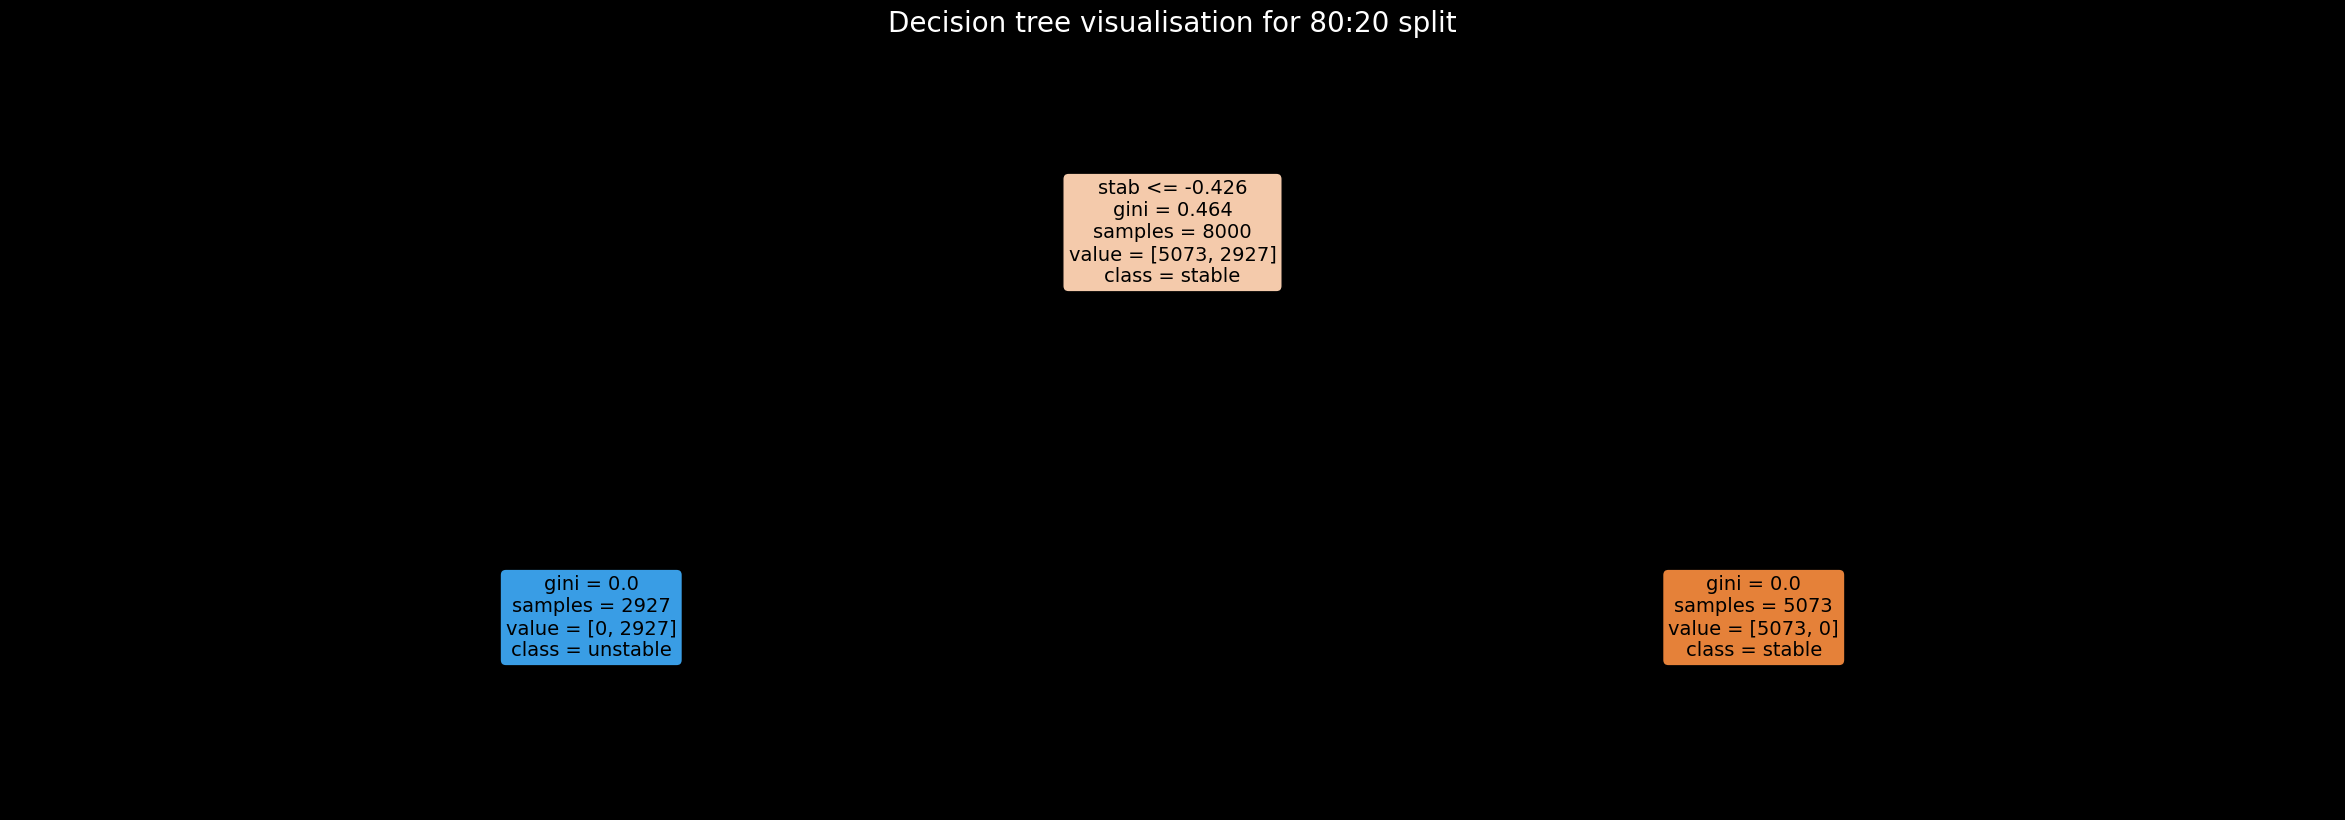

In [34]:
plt.figure(figsize=(30,10), facecolor ='k') # facecolor is background color, k is black

a = tree.plot_tree(dt_80_20,
                   feature_names = features,
                   class_names = ['stable','unstable'],
                   rounded = True,
                   filled = True,
                   fontsize=14)
plt.title('Decision tree visualisation for 80:20 split', fontsize=20, color='white')
plt.show()

# The decision tree is shallow because stab is almost perfectly predicts stabf

In [35]:
tree_rules = export_text(dt_50_50, feature_names = list(features))

print(tree_rules)

|--- stab <= -0.43
|   |--- class: 1
|--- stab >  -0.43
|   |--- class: 0



_**Explain impact of difference in data splitting on the performances of the model**_

No effect. stab predicts stabf after one split for both the 50:50 split and the 80:20 split

### Question 3
Create two more KNN-based classification models using the dataset used in Q1 by varying distance metrics such as using  cityblock and manhattan. Report the performances of the developed models including Q1 and explain the similarity or differences if any.

In [36]:
# Import modules

Import data

In [37]:
#Read in dataset
df = pd.read_csv('../data/Data_for_UCI_named.csv')

#Print dimensions
rows, cols = df.shape
print("Data has {} rows with {} columns".format(rows, cols))

df.head()

Data has 10000 rows with 14 columns


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


Prepare data

In [38]:
# Map categorical variable stabf - swap values to 0 and 1
# df['stabf'] = df['stabf'].map({'unstable': 0, 'stable': 1}) # 

# Divide this data into features and labels
X = np.asarray(df.drop(['stabf'], axis=1))
y = np.asarray(df['stabf'])

# Print the type for X and y
print ("X is of type: {}".format(type(X)))
print ("y is of type: {}".format(type(y)))

# Print the unique labels in y
print ("Unique labels: {}".format(np.unique(y)))

X is of type: <class 'numpy.ndarray'>
y is of type: <class 'numpy.ndarray'>
Unique labels: ['stable' 'unstable']


In [39]:
#Standardise the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Print the  number of samples in train and test data groups
print("Number of X_train samples: ", X_train.shape[0])
print("Number of X_test samples: ", X_test.shape[0])

# print (X_train.shape)
# print (y_train.shape)
# print (X_test.shape)
# print (y_test.shape)

Number of X_train samples:  8000
Number of X_test samples:  2000


_**Create two more KNN-based classification models using the dataset used in Q1 by varying distance metrics such as using  cityblock and manhattan**_

Cityblock

In [40]:
# Build a kNN using 5 neighbor nodes (for 6 nodes, KNN Training Accuracy: 0.96925)
knn_model_cityblock = KNeighborsClassifier(n_neighbors=5, metric='cityblock') #metric_params=None

#Fit the model using our training data
knn_model_cityblock.fit(X_train, y_train)

KNeighborsClassifier(metric='cityblock')

In [41]:
#Performance metrics

# Training Accuracy:
knn_acc = metrics.accuracy_score(y_train, knn_model_cityblock.predict(X_train))
print ("KNN Training Accuracy: {}\n".format(knn_acc))

y_pred = knn_model_cityblock.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred, digits=3))


KNN Training Accuracy: 0.9705

              precision    recall  f1-score   support

      stable      0.948     0.902     0.925       727
    unstable      0.946     0.972     0.959      1273

    accuracy                          0.947      2000
   macro avg      0.947     0.937     0.942      2000
weighted avg      0.947     0.947     0.946      2000



Manhattan

In [42]:
# Build a kNN using 5 neighbor nodes (for 6 nodes, KNN Training Accuracy: 0.96925)
knn_model_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan') #metric_params=None

#Fit the model using our training data
knn_model_manhattan.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [43]:
# Performance metrics

# Training Accuracy:
knn_acc = metrics.accuracy_score(y_train, knn_model_manhattan.predict(X_train))
print ("KNN Training Accuracy: {}\n".format(knn_acc))

y_pred = knn_model_manhattan.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred, digits=3))

KNN Training Accuracy: 0.9705

              precision    recall  f1-score   support

      stable      0.948     0.902     0.925       727
    unstable      0.946     0.972     0.959      1273

    accuracy                          0.947      2000
   macro avg      0.947     0.937     0.942      2000
weighted avg      0.947     0.947     0.946      2000



_**Explain the similarity or differences if any**_

There are no differences. Manhattan distance and cityblock distance are two names for the same thing